<a href="https://colab.research.google.com/github/thanhdtnguyen/Deep-Learning-with-Keras-Tensorflow/blob/master/convnet_sign_language_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv 
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from google.colab import files

In [21]:
# function to get the data

def get_data(filename):
  with open(filename) as training_file:
    sign_array = np.loadtxt(filename, delimiter = ",", skiprows = 1)
    labels = sign_array[:,0].astype("int")
    images = sign_array[:,1:]
    images = images.astype("float").reshape(images.shape[0],28,28)
    sign_array = None
  return images, labels

path_train = "/content/drive/My Drive/Colab Notebooks/TensorFlow in Practice/sign_mnist_train.csv"
path_test = "/content/drive/My Drive/Colab Notebooks/TensorFlow in Practice/sign_mnist_test.csv"

training_images, training_labels = get_data(path_train)

testing_images, testing_labels = get_data(path_test)

In [22]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [23]:
# add 1 more dimesion

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [24]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1.0/255)

In [27]:
model = keras.models.Sequential([layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
                                 layers.MaxPooling2D(2,2),
                                 layers.Conv2D(64, (3,3), activation="relu"),
                                 # layers.MaxPooling2D(2,2),
                                 # layers.Conv2D(128, (3,3), activation="relu"),
                                 layers.MaxPooling2D(2,2),
                                 layers.Flatten(),
                                 # layers.Dropout(0.1),
                                 layers.Dense(512, activation="relu"),
                                 layers.Dense(25, activation="softmax")])

model.compile(loss="sparse_categorical_crossentropy", optimizer=RMSprop(lr=1e-3), metrics=["accuracy"])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_21 (Dense)             (None, 25)              

In [28]:
# train the model

train_generator = train_datagen.flow(training_images, training_labels, batch_size=64)

validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size=32)

history = model.fit(train_generator, 
                    validation_data=validation_generator, 
                    epochs=30)

Epoch 1/30
429/429 [==============================] - 13s 31ms/step - loss: 2.7410 - accuracy: 0.1716 - val_loss: 2.0906 - val_accuracy: 0.3115
Epoch 2/30
429/429 [==============================] - 13s 31ms/step - loss: 2.0853 - accuracy: 0.3533 - val_loss: 1.6383 - val_accuracy: 0.4497
Epoch 3/30
429/429 [==============================] - 13s 31ms/step - loss: 1.6605 - accuracy: 0.4682 - val_loss: 1.0136 - val_accuracy: 0.6429
Epoch 4/30
429/429 [==============================] - 13s 31ms/step - loss: 1.3493 - accuracy: 0.5669 - val_loss: 0.6937 - val_accuracy: 0.7625
Epoch 5/30
429/429 [==============================] - 13s 31ms/step - loss: 1.1183 - accuracy: 0.6370 - val_loss: 0.5429 - val_accuracy: 0.8193
Epoch 6/30
429/429 [==============================] - 13s 31ms/step - loss: 0.9439 - accuracy: 0.6889 - val_loss: 0.3855 - val_accuracy: 0.8709
Epoch 7/30
429/429 [==============================] - 13s 31ms/step - loss: 0.8180 - accuracy: 0.7294 - val_loss: 0.3823 - val_accuracy:

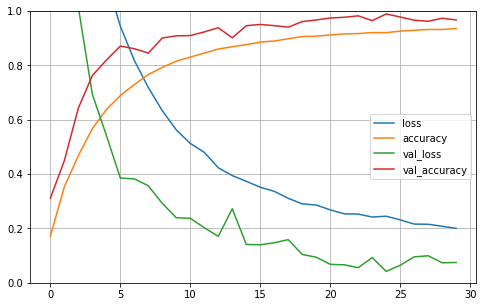

In [29]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# might be better with more epochs

In [30]:
# save the model

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

model.save("convnet_sign_language_mnist.h5")
model_file = drive.CreateFile({"title" : "convnet_sign_language_mnist.h5"})
model_file.SetContentFile("convnet_sign_language_mnist.h5")
model_file.Upload()